In [1]:
# Assignment 1, Task 1

In [2]:
# DAVE3625-1 21H - Introduksjon til kunstig intelligens 

In [3]:
# Studentcode: S344185 // Steve Benny

In [4]:
# Identify 5 unique features from this data set: "Fylke", "Område", "Kjøretøy_Kapasitet", "Linjefylke" & "Linjetype"

In [5]:
# Import modules: 

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt
import seaborn as sns
import re

In [7]:
# Import dataset / .csv:

In [8]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [9]:
# Convert blank spaces to NaN-values, using ";" beacuse the dataset is created in Norwegian Excel: 

In [10]:
df = pd.read_csv(url, sep=';')

df.head()


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [11]:
# Checking which rows Pandas is calculating / which columns is not int/float

In [12]:
df.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000
mean,0.492000,104.712167,4.512833
std,0.499978,24.225196,6.735730
min,0.000000,33.000000,-39.000000
25%,0.000000,80.000000,0.000000
50%,0.000000,106.000000,3.000000
75%,1.000000,112.000000,7.000000
max,1.000000,151.000000,64.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      6000 non-null   object
 1   Dato                                       6000 non-null   object
 2   Fylke                                      6000 non-null   object
 3   Område                                     6000 non-null   object
 4   Kommune                                    6000 non-null   object
 5   Holdeplass_Fra                             6000 non-null   object
 6   Holdeplass_Til                             6000 non-null   object
 7   Linjetype                                  6000 non-null   object
 8   Linjefylke                                 6000 non-null   object
 9   Linjenavn                                  6000 non-null   object
 10  Linjeretning                        

In [14]:
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


In [15]:
df=df.replace(r'^\s*$', np.nan, regex=True)

In [16]:
# Deleting the rows with nan-values, because this is a big dataset

In [17]:
df.dropna(inplace = True)

In [18]:
df.isna().sum()

TurId                                        0
Dato                                         0
Fylke                                        0
Område                                       0
Kommune                                      0
Holdeplass_Fra                               0
Holdeplass_Til                               0
Linjetype                                    0
Linjefylke                                   0
Linjenavn                                    0
Linjeretning                                 0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
dtype: int64

In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      6000 non-null   object
 1   Dato                                       6000 non-null   object
 2   Fylke                                      6000 non-null   object
 3   Område                                     6000 non-null   object
 4   Kommune                                    6000 non-null   object
 5   Holdeplass_Fra                             6000 non-null   object
 6   Holdeplass_Til                             6000 non-null   object
 7   Linjetype                                  6000 non-null   object
 8   Linjefylke                                 6000 non-null   object
 9   Linjenavn                                  6000 non-null   object
 10  Linjeretning                        

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000
mean,0.492000,104.712167,4.512833
std,0.499978,24.225196,6.735730
min,0.000000,33.000000,-39.000000
25%,0.000000,80.000000,0.000000
50%,0.000000,106.000000,3.000000
75%,1.000000,112.000000,7.000000
max,1.000000,151.000000,64.000000


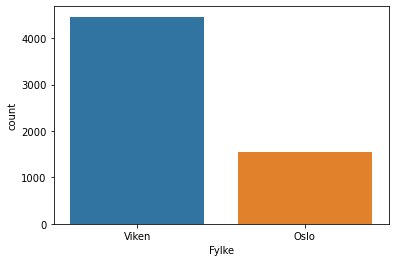

In [20]:
sns.countplot(x='Fylke', data=df);

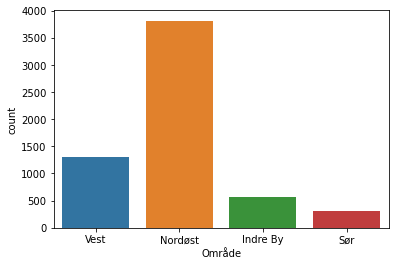

In [21]:
sns.countplot(x='Område', data=df);

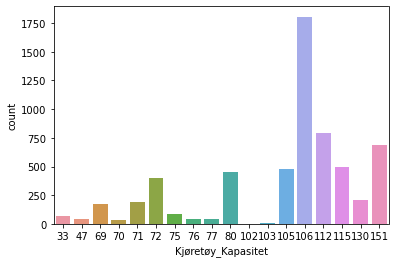

In [22]:
sns.countplot(x='Kjøretøy_Kapasitet', data=df);

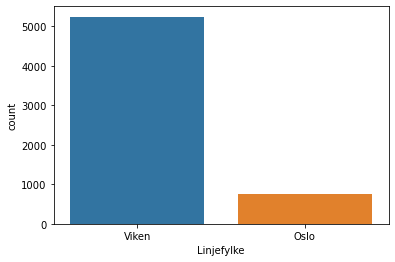

In [23]:
sns.countplot(x='Linjefylke', data=df);


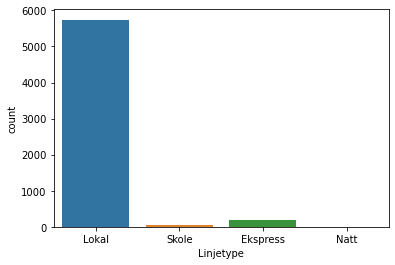

In [24]:
sns.countplot(x='Linjetype', data=df);

In [25]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord,TurId_10001-2020-06-03T17:50:00+02:00,TurId_10001-2020-06-04T11:10:00+02:00,TurId_10001-2020-06-10T15:10:00+02:00,TurId_10001-2020-06-13T05:14:00+02:00,TurId_10001-2020-06-23T17:50:00+02:00,TurId_10001-2020-06-26T14:50:00+02:00,TurId_10001-2020-06-29T07:10:00+02:00,...,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:25:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:29:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:31:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:35:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:38:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:40:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:43:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:44:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:46:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:48:00
0,0,112,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,112,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,112,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,112,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,112,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
